Przewidywanie, czy klient kupi produkt, na podstawie dwóch cech: wieku i płci za pomocą sieci neuronowej z warstwą wejściową, warstwą ukrytą i warstwą wyjściową

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [41]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        # Inicjalizacja wag i biasów losowo
        self.hidden_weights = np.random.randn(2, 2)  # 2 neurony w warstwie ukrytej
        self.hidden_bias = np.random.randn(2)
        self.output_weights = np.random.randn(2)     # 2 neurony ukryte -> 1 neuron wyjściowy
        self.output_bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):                        #funkcja aktywacji
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        sig = self._sigmoid(x)
        return sig * (1 - sig)

    def predict(self, input_vector):        
        hidden_input = np.dot(input_vector, self.hidden_weights) + self.hidden_bias                         #przewyidywanie wejścia i wyjścia warstwy ukrytej
        hidden_output = self._sigmoid(hidden_input)

        final_input = np.dot(hidden_output, self.output_weights) + self.output_bias                         #przewyidywanie wejścia i wyjścia funkcji wejściowej
        output = self._sigmoid(final_input)
        return output

    def _compute_gradients(self, input_vector, target):            #backpropagation
        hidden_input = np.dot(input_vector, self.hidden_weights) + self.hidden_bias
        hidden_output = self._sigmoid(hidden_input)

        final_input = np.dot(hidden_output, self.output_weights) + self.output_bias                     
        prediction = self._sigmoid(final_input)
        
        derror_dprediction = 2 * (prediction - target)
        dprediction_dfinal_input = self._sigmoid_deriv(final_input)                               #obliczenia potrzebne do gradientu

        derror_doutput_weights = derror_dprediction * dprediction_dfinal_input * hidden_output    # gradienty dla wag i biasu warstwy wyjściowej
        derror_doutput_bias = derror_dprediction * dprediction_dfinal_input * 1

        dhidden_output_dhidden_input = self._sigmoid_deriv(hidden_input)                          # gradienty dla warstwy ukrytej
        derror_dhidden_input = (
            derror_dprediction * dprediction_dfinal_input * self.output_weights * dhidden_output_dhidden_input
        )

        derror_dhidden_weights = np.outer(input_vector, derror_dhidden_input)
        derror_dhidden_bias = derror_dhidden_input

        return derror_doutput_weights, derror_doutput_bias, derror_dhidden_weights, derror_dhidden_bias

    def _update_parameters(self, d_out_w, d_out_b, d_hidden_w, d_hidden_b):                         #aktualizacja parametrów
        self.output_weights -= self.learning_rate * d_out_w                   
        self.output_bias -= self.learning_rate * d_out_b
        self.hidden_weights -= self.learning_rate * d_hidden_w
        self.hidden_bias -= self.learning_rate * d_hidden_b


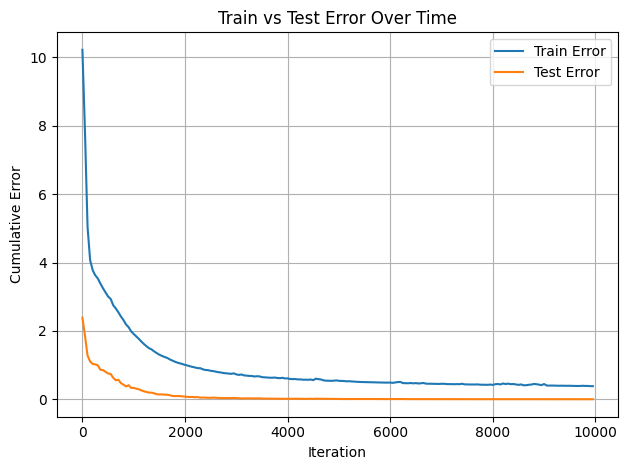

In [42]:
input_vectors = np.array([                                                      #zakładamy, że nasz produkt jest popularny zwłaszcza wśród kobiet(drugi input = 1), w wieku starszym niż 30 lat
    [18, 0], [22, 0], [25, 0], [28, 0], [30, 0], [32, 0],
    [35, 1], [37, 1], [40, 1], [42, 1], [45, 1], [48, 1],
    [50, 1], [52, 1], [55, 1], [60, 1], [65, 1], [70, 1],
    [25, 0], [27, 0], [33, 0], [36, 0], [38, 0], [43, 0],
])

targets = np.array([
    0, 0, 0, 0, 0, 0, 
    1, 1, 1, 1, 1, 1,  
    1, 1, 1, 1, 1, 1,  
    0, 0, 1, 1, 1, 1   
])

ages = input_vectors[:, 0]                                       # standaryzacja wieku na podstawie całego zbioru (można osobno na train, ale uprośćmy)
binary_features = input_vectors[:, 1]
age_mean = np.mean(ages)
age_std = np.std(ages)
ages_standardized = (ages - age_mean) / age_std

processed_inputs = np.column_stack((ages_standardized, binary_features))


X_train, X_test, y_train, y_test = train_test_split(                              # podział na zbiór treningowy i testowy (80/20)
    processed_inputs, targets, test_size=0.2, random_state=42
)

nn = NeuralNetwork(learning_rate=0.1)                              # inicjalizacja i trening

train_errors = []
test_errors = []

iterations = 10000

for i in range(iterations):
    idx = np.random.randint(len(X_train))
    d_out_w, d_out_b, d_hidden_w, d_hidden_b = nn._compute_gradients(X_train[idx], y_train[idx])
    nn._update_parameters(d_out_w, d_out_b, d_hidden_w, d_hidden_b)

    if i % 50 == 0:                                   # co 50 iteracji: liczę błędy
        train_error = sum((nn.predict(x) - y) ** 2 for x, y in zip(X_train, y_train))
        test_error = sum((nn.predict(x) - y) ** 2 for x, y in zip(X_test, y_test))
        train_errors.append(train_error)
        test_errors.append(test_error)


plt.plot(range(0, iterations, 50), train_errors, label='Train Error')                    # wizualizacja
plt.plot(range(0, iterations, 50), test_errors, label='Test Error')
plt.xlabel('Iteration')
plt.ylabel('Cumulative Error')
plt.title('Train vs Test Error Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()